# Monte Carlo Methods

### Last Class
- Kernel Density Functions

### Goals for Today
- Define uncertainty analysis
- Implement Monte Carlo uncertainty analysis in a mathematical model
- Apply Monte Carlo uncertainty analysis to deterministic models

### Pre-Lecture Activities

- [MATH 360 > Monte Carlo Uncertainty Analysis](http://ubcmath.github.io/MATH360/)

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
%matplotlib inline


print("packages imported")

packages imported


### Applied Force Uncertainty Analysis

In groups of 3-4, simulate the uncertainty in the force applied to a wall by throwing a ball against it.  Recall that $F = ma$, where $F$ is force, $m$ is mass, and $a$ is acceleration given by $a = \frac{v}{t}$, with $v$ velocity and $t$ time.  We have the following information about the measurements:

|quantity| value | uncertainty|
|----------|-------------|-----------------|
|mass| 0.055 kg |$\pm 0.001$ kg|
|velocity| 10 m/s |$\pm 0.5$ m/s|
|  time  | 5 s | $\pm 1$ s |


Simulate the uncertainty for $N=10000$ times. 

Determine which parameter is responsible for the largest amount of variance in the acceleration.

### Application to Deterministic Models

Let's see how measurement uncertainty can affect the solution in deterministic modelling (i.e., differential equations).

We have previously seen the Energy Balance Model when looking at Deterministic Models.  As a reminder, we have 

$$k \frac{dT}{dt} = \pi R^2Q(1-\alpha(T)) - 4 \pi R^2 \sigma \varepsilon T^4,$$

where
- $k$ is the heat capacity of the Earth (J/K)
- $T$ is the temperature of the Earth (K)
- $t$ is the time (s)
- $R$ is the radius of the Earth (m)
- $Q$ is the amount of solar energy that reaches the Earth's surface (s$^{-1}$ m$^{-2}$)
- $\alpha(T)$ is the albedo of the Earth and is unitless
- $\sigma$ is the Stefan-Boltzmann constant (W/(m$^2$K$^4$) ) 
- $\varepsilon$ is the emissivity and is unitless

For the albedo, we had two possible functions (which gave rise to two different Energy Balance Models):
$$\alpha_1(T) = 0.3$$ 
or 
$$\alpha_2(T)=
\begin{cases}
0.7, T \leq 247 K\\
3.52296-0.011429T, 247 < T  < 282 K \\
0.3, T \geq 282 K
\end{cases}$$

We also know the following information about the uncertainty of the constant values:
|Constant| Value|Uncertainty| 
|--------|------|-----------|
|$k$      | $1.0 \times 10^{23}$ J/K| $\pm 0.22 \times 10^{9}$ J/K|
|$R$      | $6.3781 \times 10^6$  m| $\pm 10$ m|
|$Q$      | $1365$    W/(s m$^2$)| $\pm 27.3$ W/(s m$^2$)|
|$\sigma$ | $5.6704 \times 10^{-8}$ W/(m$^2$K$^4$) | $\pm 0.000021 \times 10^{-8}$ W/(m$^2$K$^4$)|

Let's see how to incorporate the uncertainty in to the model and the effects on the solutions.

In [13]:
import scipy.integrate as spi
import scipy.optimize as spo

In [14]:
## Let's look at the energy balance equation with \alpha_1(T) 
eps = 0.622
alpha = 0.3

f = lambda T,t: (np.pi*R**2*Q*(1 - alpha) - 4*np.pi*R**2*eps*sigma*T**4)/k
t = np.linspace(0,1e9,100)

T0 = 267

## generate deterministic solution
Q = 1365 
R = 6.3781e6 
k = 1e23 
sigma = 5.670374419e-8 
T_determin = spi.odeint(f,T0,t)
t_determin = t

In [16]:
## Add some packages to make an animation
from matplotlib.animation import FuncAnimation
import IPython

### Energy Balance Model Uncertainty Analysis

Add uncertainty to the Energy Balance Model with $\alpha_2(T)$. Use an initial temperature of $267$.  How does the result change when $\alpha_1(T)$ is replaced with $\alpha_2(T)$.

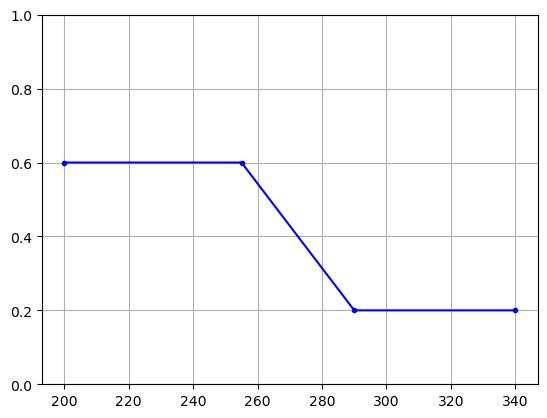

In [20]:
temp = [200,255,290,340]
albedo = [0.6,0.6,0.2,0.2]
plt.plot(temp,albedo,'b.-'), plt.ylim([0,1]), plt.grid(True)
plt.show()

In [21]:
## Deterministic solution
t = np.linspace(0,1e9,100)
alpha = lambda T: np.interp(T,temp,albedo)
f1 = lambda T,t: (np.pi*R**2*Q*(1 - alpha(T)) - 4*np.pi*R**2*eps*sigma*T**4)/k

T0 = 267

## generate deterministic solution
Q = 1365 
R = 6.3781e6 
k = 1e23 
sigma = 5.670374419e-8 
T_determin1 = spi.odeint(f1,T0,t)
t_determin1 = t

### Energy Balance Model Uncertainty Analysis 2

In groups of 4-6, add uncertainty to the Energy Balance Model's initial temperature using $\alpha_2(T)$.  For this task use $267 \pm 1$ K  How does the result change as the uncertainty is increased?